In [1]:
#Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('AAPL.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2021-11-11,2021-11-11,148.960007,149.429993,147.679993,147.869995,147.016739,41000000
2021-11-12,2021-11-12,148.429993,150.399994,147.479996,149.990005,149.124512,63804000
2021-11-15,2021-11-15,150.369995,151.880005,149.429993,150.000000,149.134445,59222800
2021-11-16,2021-11-16,149.940002,151.490005,149.339996,151.000000,150.128693,59256200
2021-11-17,2021-11-17,151.000000,155.000000,150.990005,153.490005,152.604324,88807000
...,...,...,...,...,...,...,...
2022-11-07,2022-11-07,137.110001,139.149994,135.669998,138.919998,138.919998,83374600
2022-11-08,2022-11-08,140.410004,141.429993,137.490005,139.500000,139.500000,89908500
2022-11-09,2022-11-09,138.500000,138.550003,134.589996,134.869995,134.869995,74917800
2022-11-10,2022-11-10,141.240005,146.869995,139.500000,146.869995,146.869995,118854000


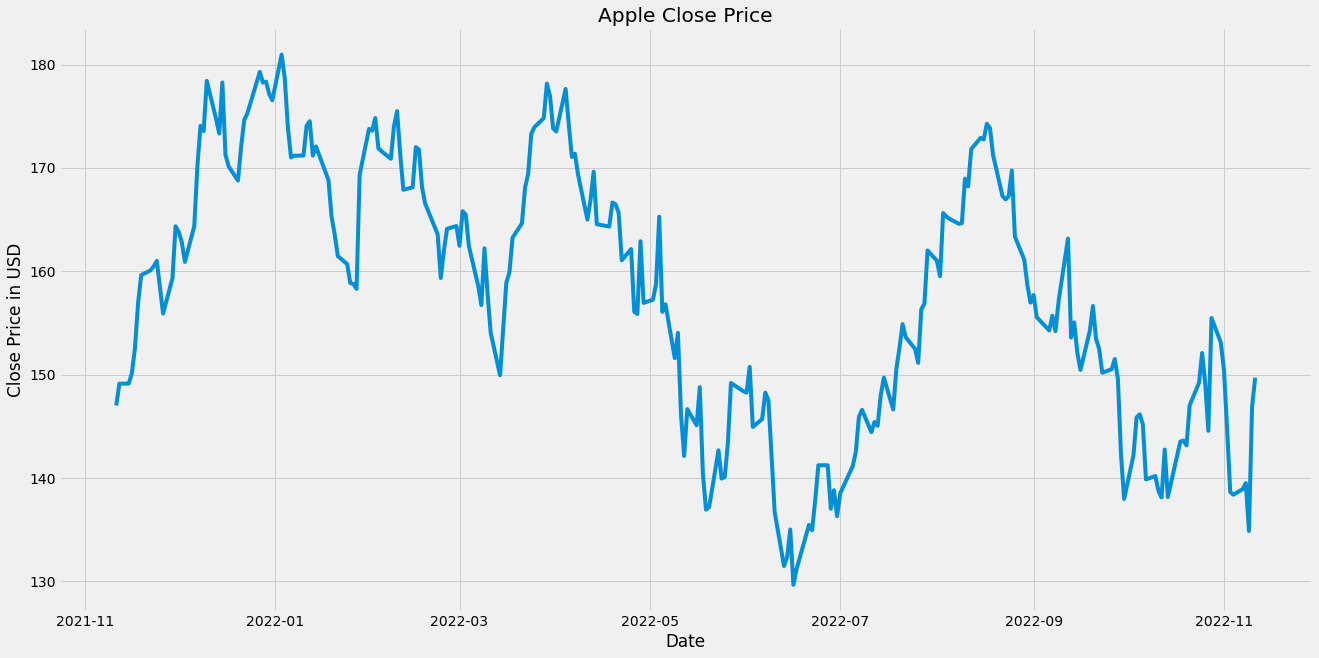

In [7]:
plt.figure(figsize=(20,10))
plt.title('Apple Close Price')
plt.plot(df['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.show()

In [8]:
def moving_average(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

In [9]:
df['SMA_30'] = moving_average(df)

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_30
2021-11-11,2021-11-11,148.960007,149.429993,147.679993,147.869995,147.016739,41000000,NaN
2021-11-12,2021-11-12,148.429993,150.399994,147.479996,149.990005,149.124512,63804000,NaN
2021-11-15,2021-11-15,150.369995,151.880005,149.429993,150.000000,149.134445,59222800,NaN
2021-11-16,2021-11-16,149.940002,151.490005,149.339996,151.000000,150.128693,59256200,NaN
2021-11-17,2021-11-17,151.000000,155.000000,150.990005,153.490005,152.604324,88807000,NaN
...,...,...,...,...,...,...,...,...
2022-11-07,2022-11-07,137.110001,139.149994,135.669998,138.919998,138.919998,83374600,144.647333
2022-11-08,2022-11-08,140.410004,141.429993,137.490005,139.500000,139.500000,89908500,144.238666
2022-11-09,2022-11-09,138.500000,138.550003,134.589996,134.869995,134.869995,74917800,143.739666
2022-11-10,2022-11-10,141.240005,146.869995,139.500000,146.869995,146.869995,118854000,143.885999


In [17]:
def strategy(df):
    buy = []
    sell = []
    flag = 0
    buy_price = 0
    sell_price = 0
    
    for i in range(len(df)):
        
        if df['SMA_30'][i] > df['Close'][i] and flag == 0:
            buy.append(df['Close'][i])
            sell.append(np.nan)
            buy_price = df['Close'][i]
            flag = 1
        elif df['SMA_30'][i] < df['Close'][i] and flag == 1 and buy_price < df['Close'][i]:
            sell.append(df['Close'][i])
            buy.append(np.nan)
            sell_price = df['Close'][i]
            buy_price = 0
            flag = 0
        else:
            sell.append(np.nan)
            buy.append(np.nan)
    
    return (buy, sell)

In [18]:
# strat = strategy(df)

df['Buy'] = strategy(df)[0]
df['Sell'] = strategy(df)[1]

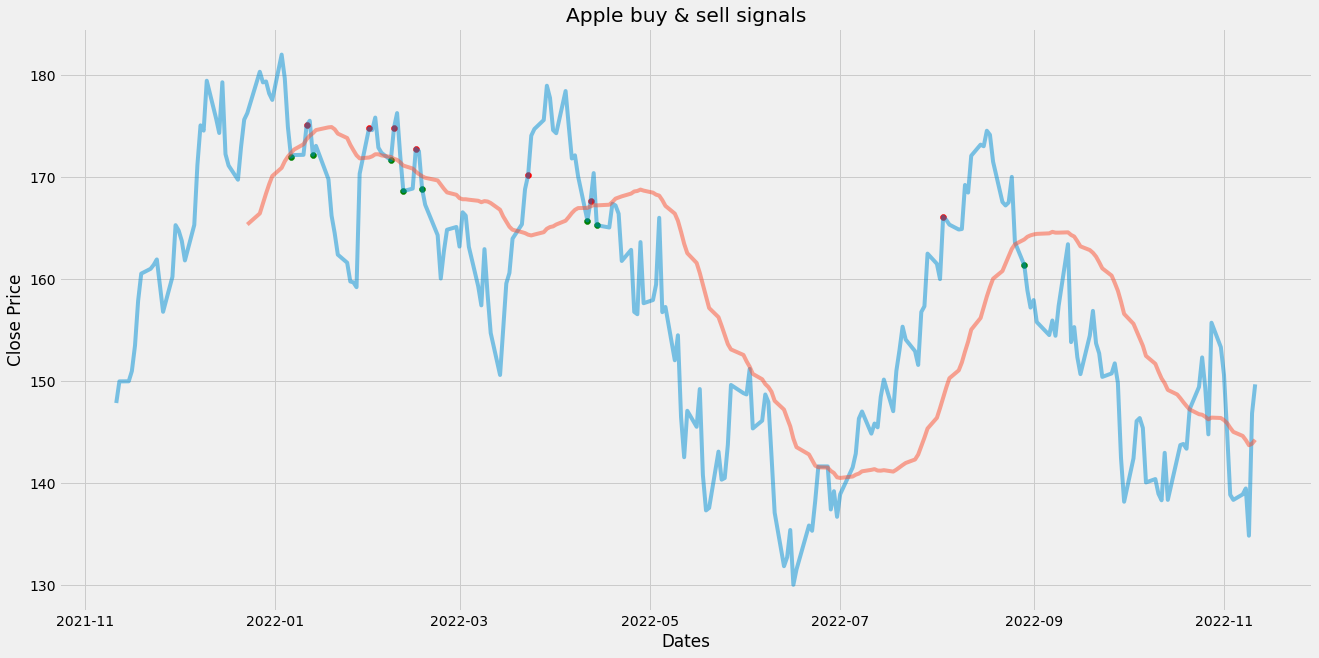

In [20]:
plt.figure(figsize=(20,10))
plt.title('Apple buy & sell signals')
plt.plot(df['Close'], alpha = 0.5, label='CLose')
plt.plot(df['SMA_30'], alpha=0.5, label='SMA_30')
plt.scatter(df.index, df['Buy'], color='green', label='Buy Signal', alpha= 1)
plt.scatter(df.index, df['Sell'], color = 'red', label = 'Sell Signal', alpha = 1)
plt.xlabel('Dates')
plt.ylabel('Close Price')
plt.show()